In [112]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import pandas as pd
import math

In [241]:
df = pd.read_csv('pages.csv')
for i in range(df["CTR"].count()):
    df.at[i, 'CTR'] = float(df.at[i, 'CTR'].replace('%', ''))
df.fillna(0, inplace=True)
df = df.sort_values(by='Impressions')

In [242]:
# some usefull fields
# service
services_code = [i+1 for i in range(df['service'].max())]
service_news_counter = [df.loc[df['service'] == i+1, 'Top pages'].count() for i in range(df['service'].max())]
service_impression_total = [df.loc[df['service'] == i+1, 'Impressions'].sum() for i in range(df['service'].max())]
service_impression_average = [df.loc[df['service'] == i+1, 'Impressions'].mean() for i in range(df['service'].max())]
service_clicks_total = [df.loc[df['service'] == i+1, 'Clicks'].sum() for i in range(df['service'].max())]
service_clicks_average = [df.loc[df['service'] == i+1, 'Clicks'].mean() for i in range(df['service'].max())]
# category
category_code = [[i+1 for i in range(df['category'].max())] for _ in range(df['service'].max())]
category_news_counter = [[df.loc[(df['service'] == i+1) & (df['category'] == j+1), 'Top pages'].count() for j in range(df['category'].max())] for i in range(df['service'].max())]
category_impression_total = [[df.loc[(df['service'] == i+1) & (df['category'] == j+1), 'Impressions'].sum() for j in range(df['category'].max())] for i in range(df['service'].max())]
category_impression_average = [[df.loc[(df['service'] == i+1) & (df['category'] == j+1), 'Impressions'].mean() for j in range(df['category'].max())] for i in range(df['service'].max())]
category_clicks_total = [[df.loc[(df['service'] == i+1) & (df['category'] == j+1), 'Clicks'].sum() for j in range(df['category'].max())] for i in range(df['service'].max())]
category_clicks_average = [[df.loc[(df['service'] == i+1) & (df['category'] == j+1), 'Clicks'].mean() for j in range(df['category'].max())] for i in range(df['service'].max())]

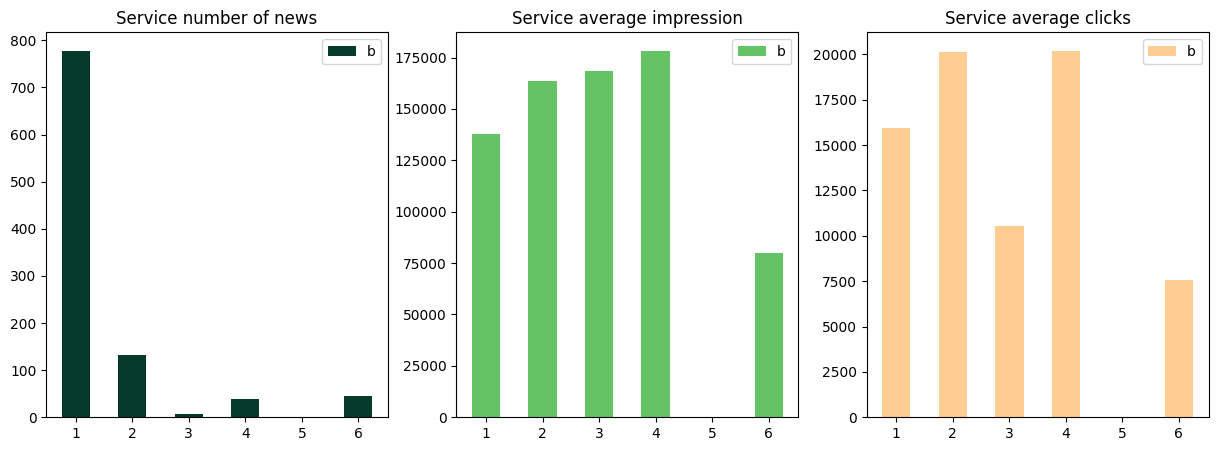

In [243]:
colors = ['#063b2b', '#65c265', '#ffcc91']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(services_code, service_news_counter, color=colors[0], width=0.5)
plt.title("Service number of news")
plt.legend("bar")

plt.subplot(1, 3, 2)
plt.bar(services_code, service_impression_average, color=colors[1], width=0.5)
plt.title("Service average impression")
plt.legend("bar")

plt.subplot(1, 3, 3)
plt.bar(services_code, service_clicks_average, color=colors[2], width=0.5)
plt.title("Service average clicks")
plt.legend("bar")

plt.show()

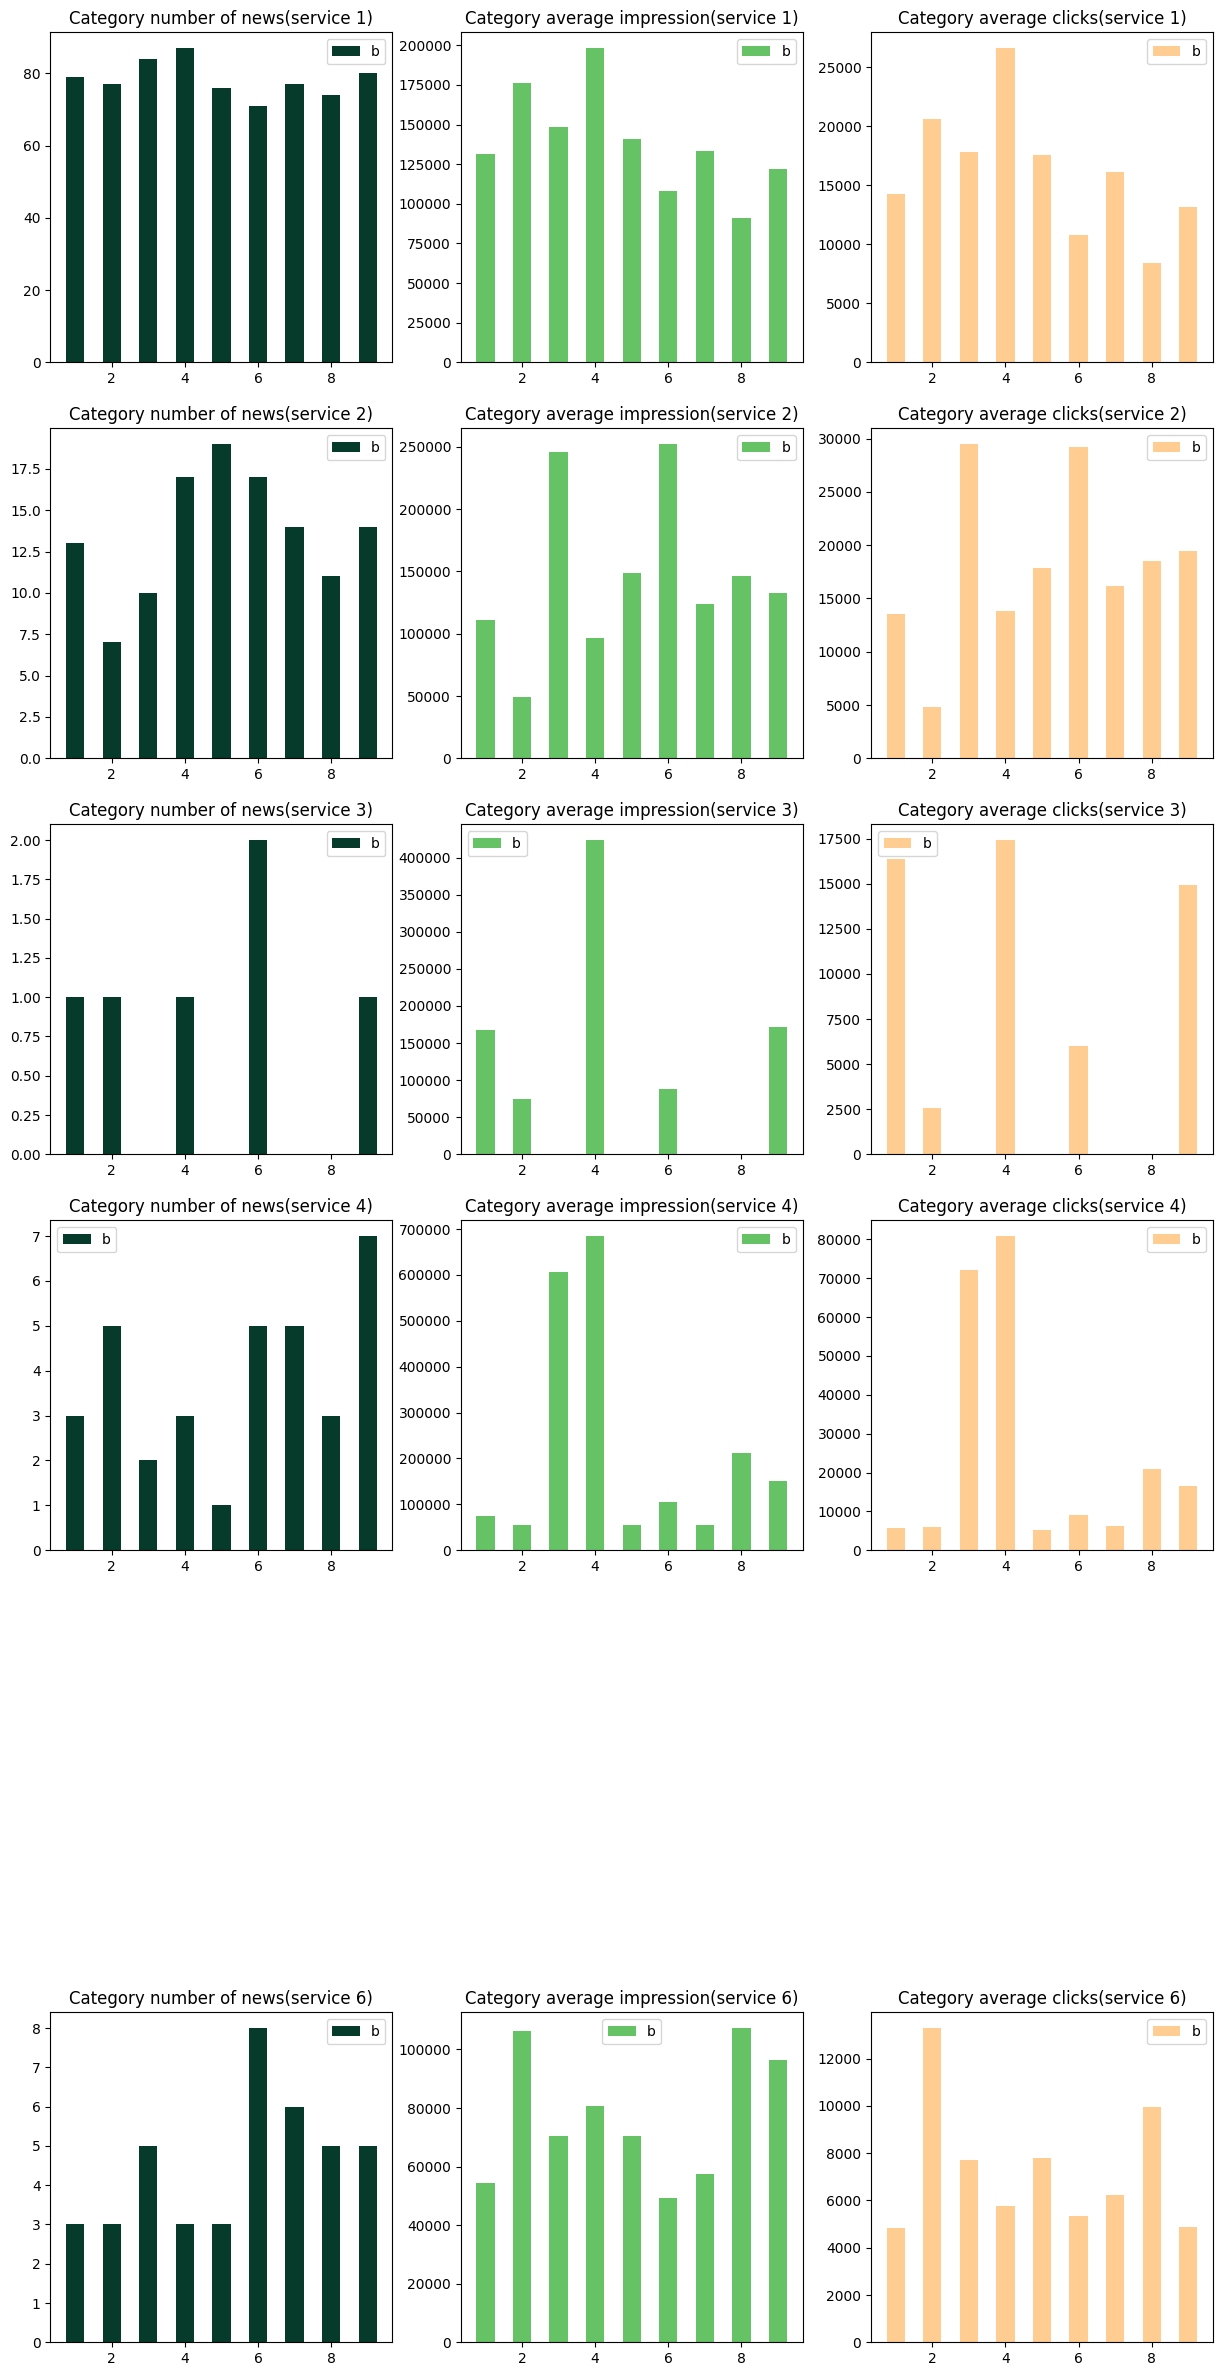

In [244]:

plt.figure(figsize=(15, 5 * df['service'].max()))
for i in range(df['service'].max()):
    if len(df[df['service'] == i+1]) == 0:
        continue
    plt.subplot(df['service'].max(), 3, 1 + 3 * i)
    plt.bar(category_code[i], category_news_counter[i], color=colors[0], width=0.5)
    plt.title("Category number of news(service {})".format(i+1))
    plt.legend("bar")

    plt.subplot(df['service'].max(), 3, 2 + 3 * i)
    plt.bar(category_code[i], category_impression_average[i], color=colors[1], width=0.5)
    plt.title("Category average impression(service {})".format(i+1))
    plt.legend("bar")

    plt.subplot(df['service'].max(), 3, 3 + 3 * i)
    plt.bar(category_code[i], category_clicks_average[i], color=colors[2], width=0.5)
    plt.title("Category average clicks(service {})".format(i+1))
    plt.legend("bar")
    
plt.show()

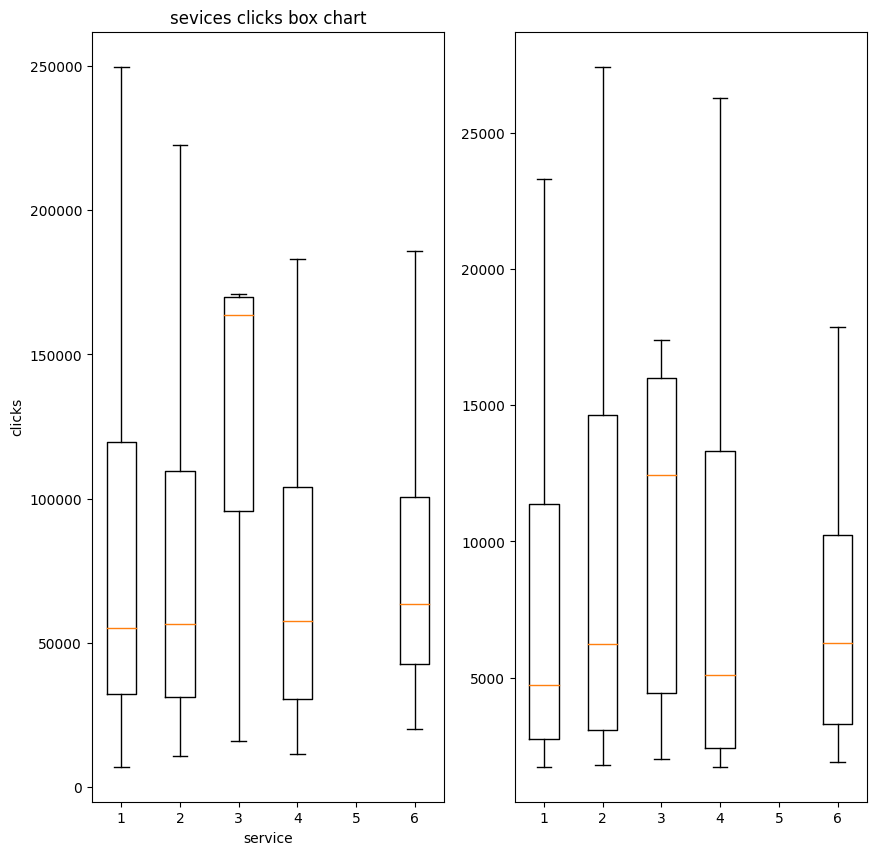

In [279]:
x = df.loc[df['service'] == 1, 'Impressions']
y = df.loc[df['service'] == 2, 'Impressions']


fig, axes = plt.subplots(1, 2, figsize=(10, 10))
 
# Creating axes instance
axes[0].boxplot([df.loc[df['service'] == i, 'Impressions'] for i in services_code], showfliers=False)
axes[0].set_title("sevices impression box chart")
axes[0].set_xlabel("service")
axes[0].set_ylabel("impression")

# Creating axes instance
axes[1].boxplot([df.loc[df['service'] == i, 'Clicks'] for i in services_code], showfliers=False)
axes[0].set_title("sevices clicks box chart")
axes[0].set_xlabel("service")
axes[0].set_ylabel("clicks")
 
# show plot
plt.show()


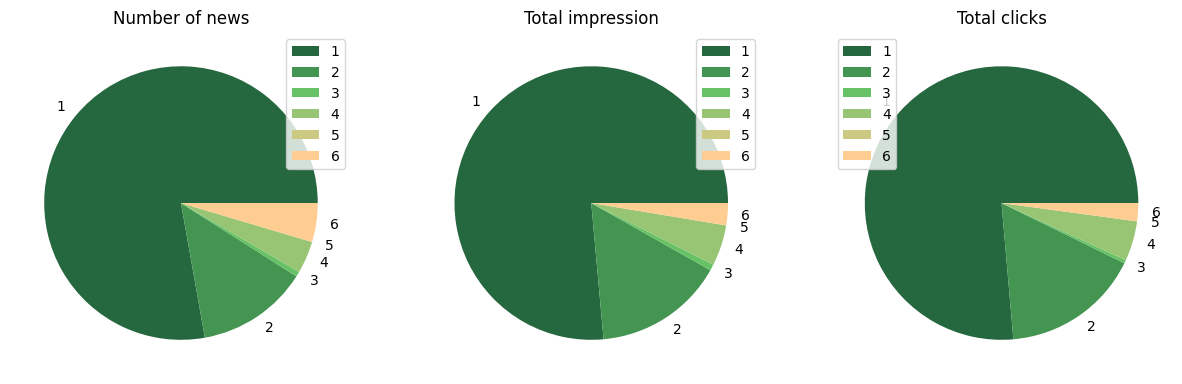

In [246]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pie(service_news_counter, labels=services_code, colors=[cmap(services_code[i] / len(services_code)) for i in range(len(services_code))])
plt.title("Number of news")
plt.legend()

plt.subplot(1, 3, 2)
plt.pie(service_impression_total, labels=services_code,  colors=[cmap(services_code[i] / len(services_code)) for i in range(len(services_code))])
plt.title("Total impression")
plt.legend()

plt.subplot(1, 3, 3)
plt.pie(service_clicks_total, labels=services_code,  colors=[cmap(services_code[i] / len(services_code)) for i in range(len(services_code))])
plt.title("Total clicks")
plt.legend()
plt.show()

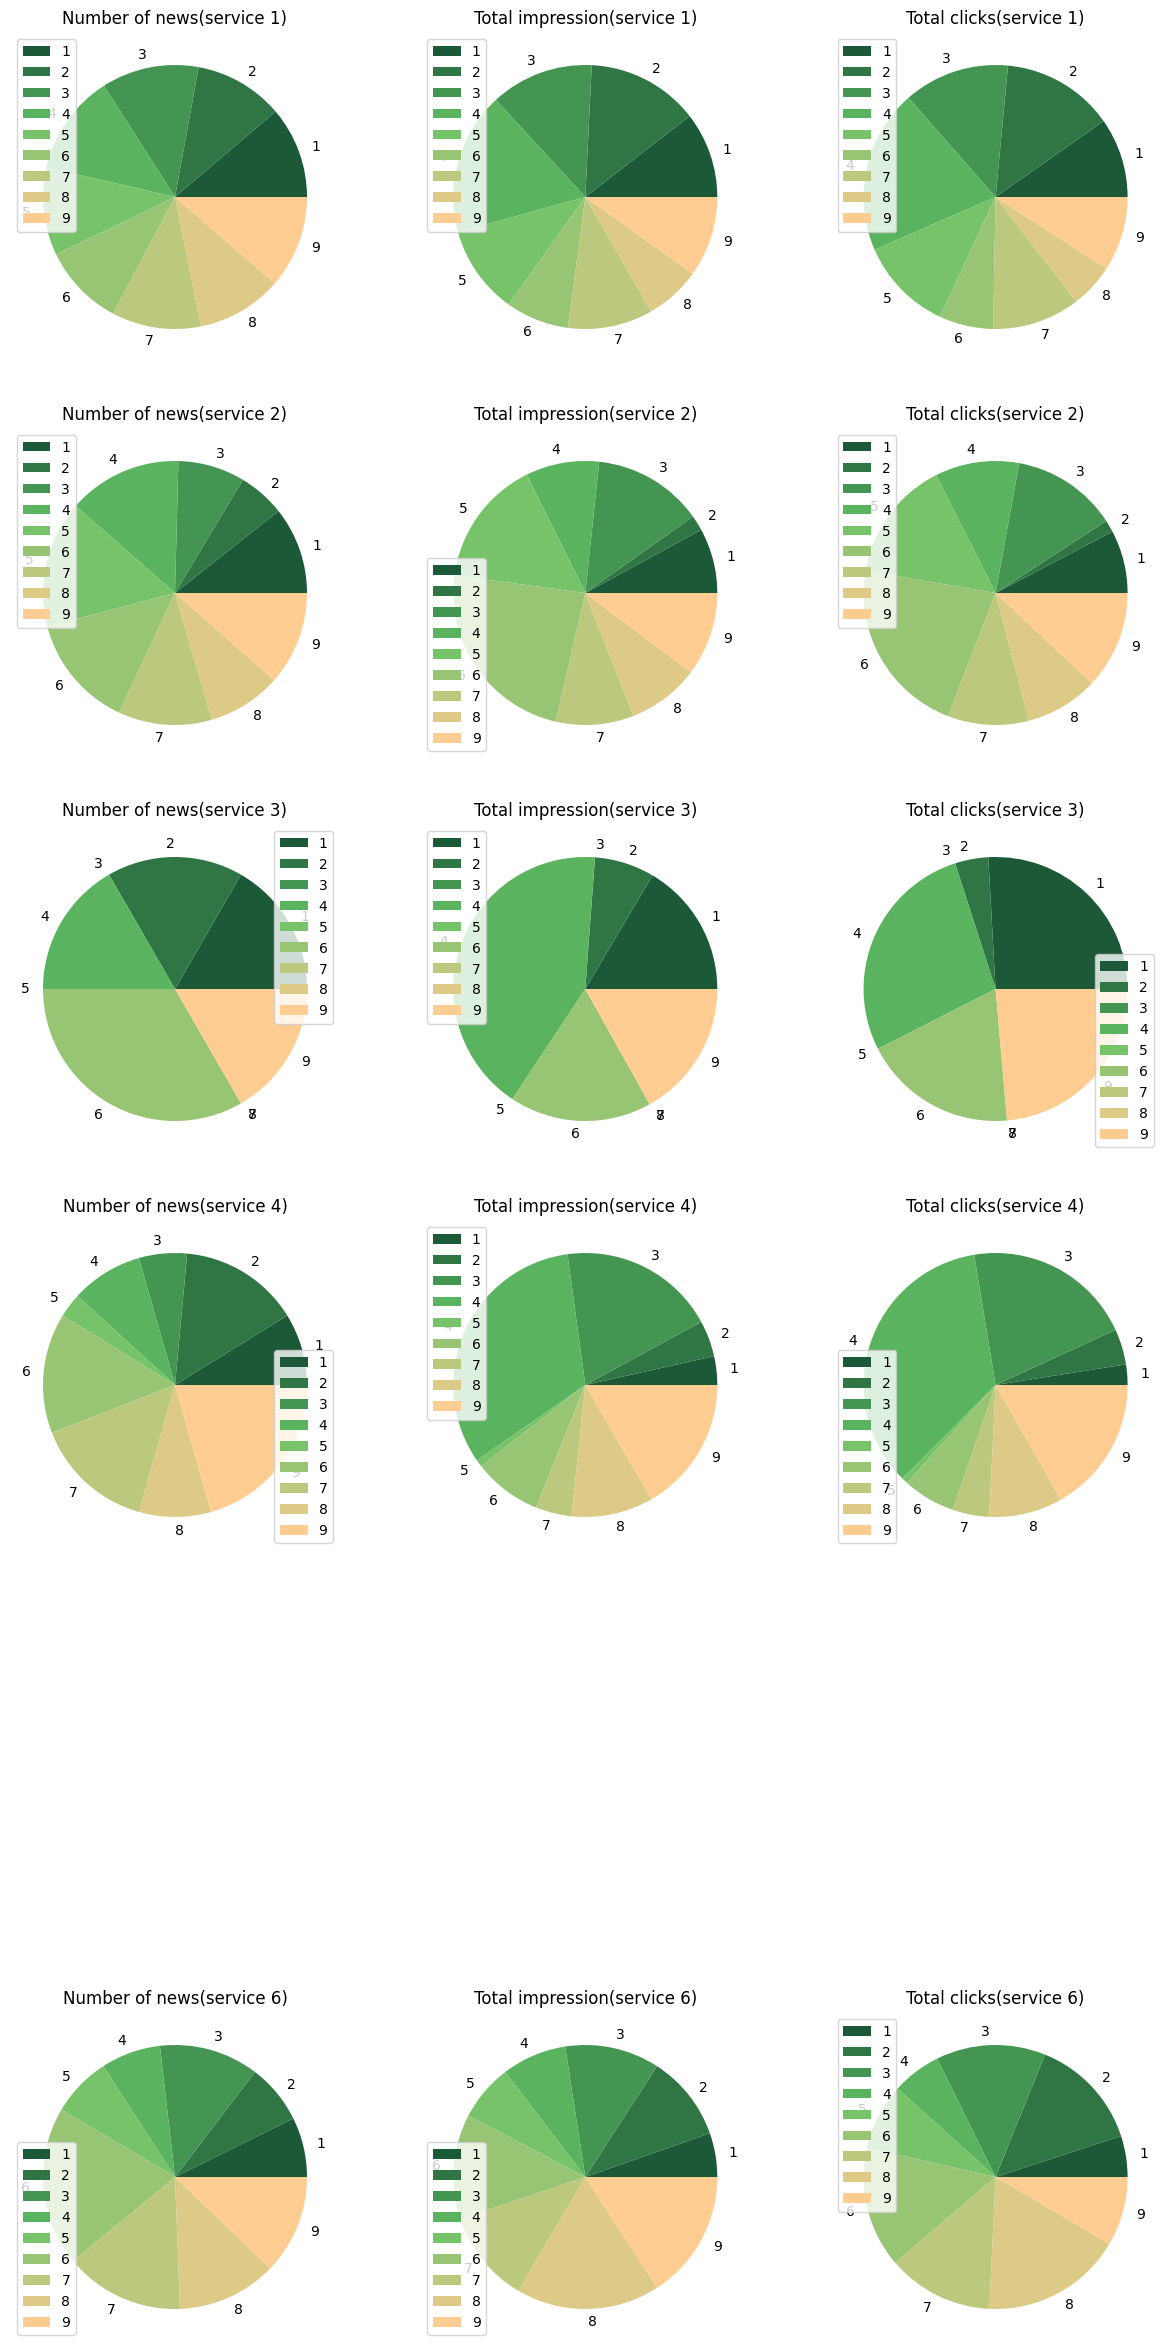

In [247]:


plt.figure(figsize=(15, 5 * df['service'].max()))
for i in range(df['service'].max()):
    if len(df[df['service'] == i+1]) == 0:
        continue
    plt.subplot(df['service'].max(), 3, 1 + 3 * i)
    plt.pie(category_news_counter[i], labels=category_code[i], colors=[cmap(category_code[i][j] / len(category_code[i])) for j in range(len(category_code[i]))])
    plt.title("Number of news(service {})".format(i+1))
    plt.legend()

    plt.subplot(df['service'].max(), 3, 2 + 3 * i)
    plt.pie(category_impression_total[i], labels=category_code[i], colors=[cmap(category_code[i][j] / len(category_code[i])) for j in range(len(category_code[i]))])
    plt.title("Total impression(service {})".format(i+1))
    plt.legend()

    plt.subplot(df['service'].max(), 3, 3 + 3 * i)
    plt.pie(category_clicks_total[i], labels=category_code[i], colors=[cmap(category_code[i][j] / len(category_code[i])) for j in range(len(category_code[i]))])
    plt.title("Total clicks(service {})".format(i+1))
    plt.legend()
plt.show()

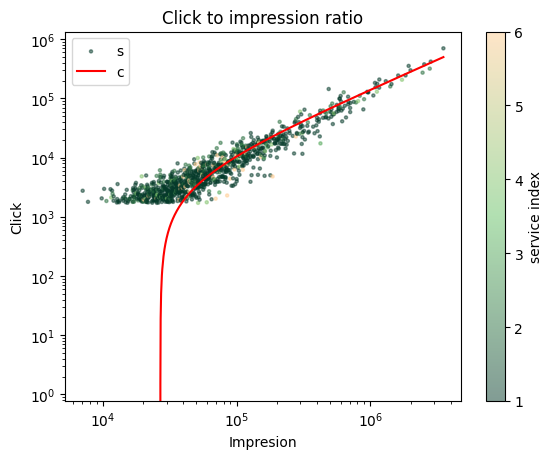

In [258]:
x = df['Impressions']
y = df['Clicks']
colors = df['CTR']
plt.xscale("log")
plt.yscale("log")
plt.scatter(x, y, c=df['service'], s = 5, alpha=0.5, cmap=cmap)


m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')


plt.colorbar().set_label("service index")
plt.title("Click to impression ratio")
plt.xlabel("Impresion")
plt.ylabel("Click")
plt.legend('scatter', loc='upper left')
plt.show()

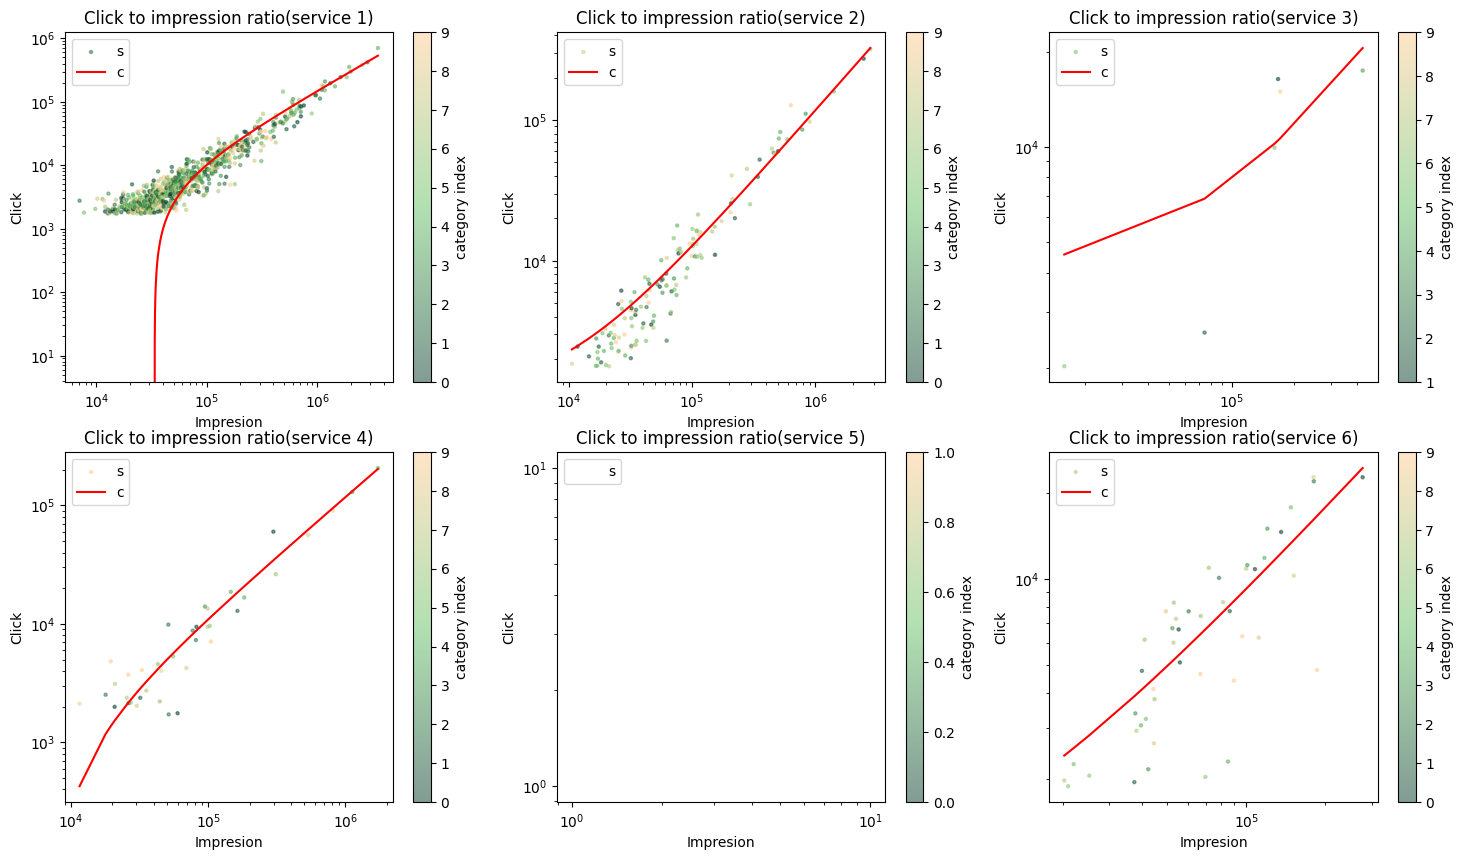

In [259]:

plt.figure(figsize=(18, 5 * df['service'].max() / 3))
for i in range(df['service'].max()):
    x = df.loc[df['service'] == i+1, 'Impressions']
    y = df.loc[df['service'] == i+1, 'Clicks']
    colors = df['CTR']
    plt.subplot(math.ceil(df['service'].max()/3) , 3, i+1)
    plt.xscale("log")
    plt.yscale("log")
    plt.scatter(x, y, c=df.loc[df['service'] == i+1, 'category'], s = 5, alpha=0.5, cmap=cmap)

    if len(x) != 0:
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x+b, color='red')

    plt.colorbar().set_label("category index")
    plt.title("Click to impression ratio(service {})".format(i+1))
    plt.xlabel("Impresion")
    plt.ylabel("Click")
    plt.legend('scatter', loc='upper left')
plt.show()

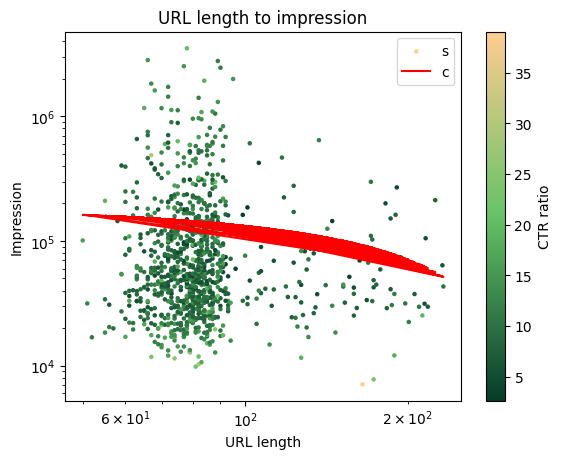

In [254]:
x = [len(i) for i in df['Top pages']]
y = [i for i in df['Impressions']]
colors = [i for i in df['CTR']]
plt.xscale("log")
plt.yscale("log")
plt.scatter(x, y, c = colors, cmap=cmap, s=5, alpha=1)
plt.title("URL length to impression")
plt.xlabel("URL length")
plt.ylabel("Impression")
plt.colorbar().set_label("CTR ratio")
plt.legend('scatter')
plt.show()

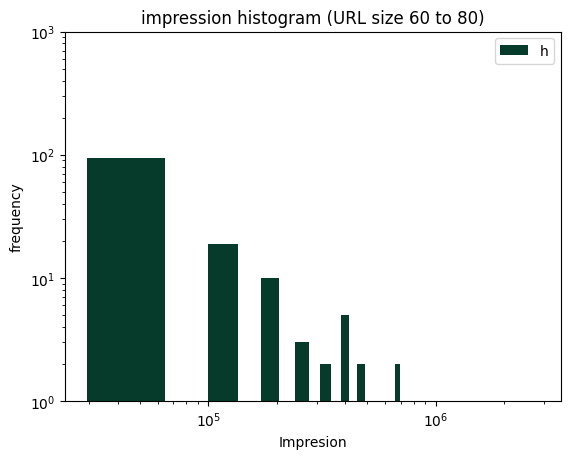

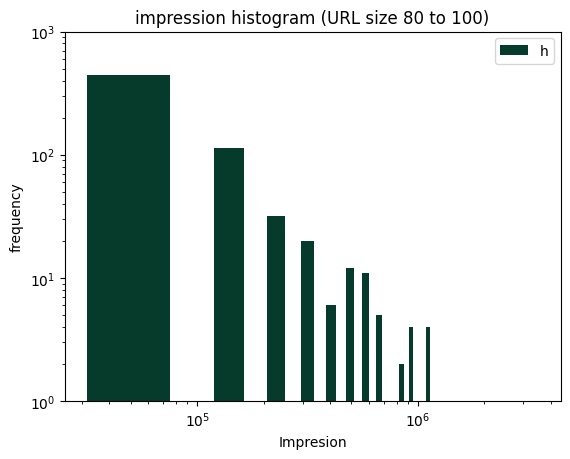

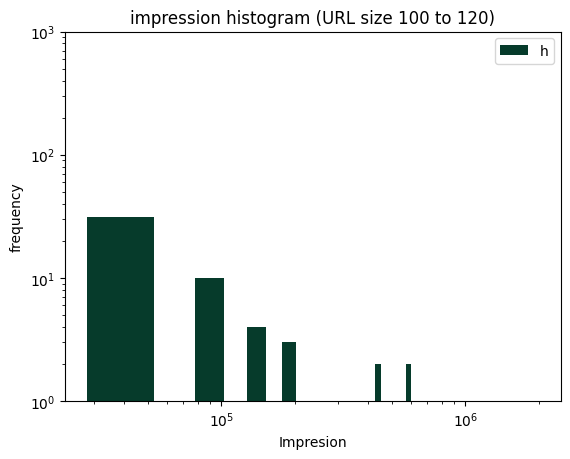

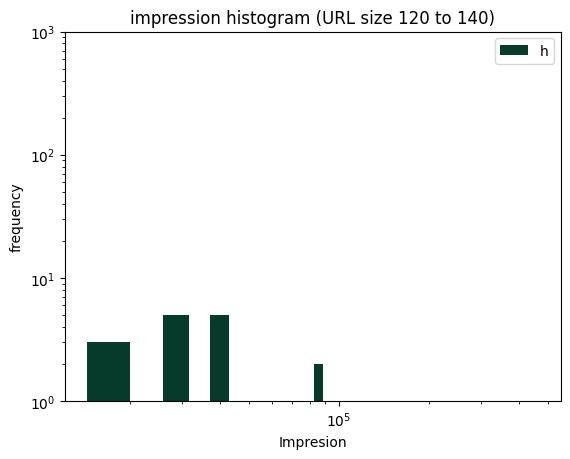

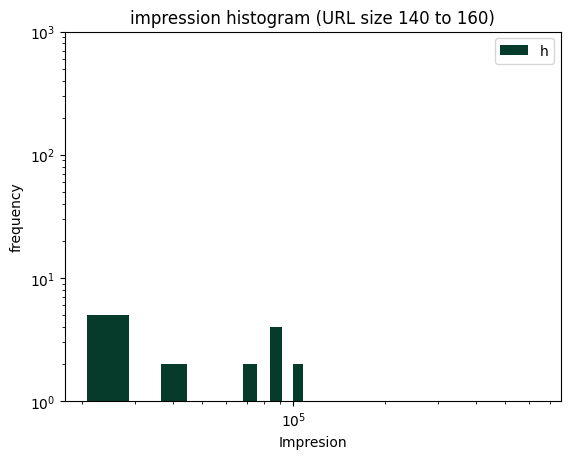

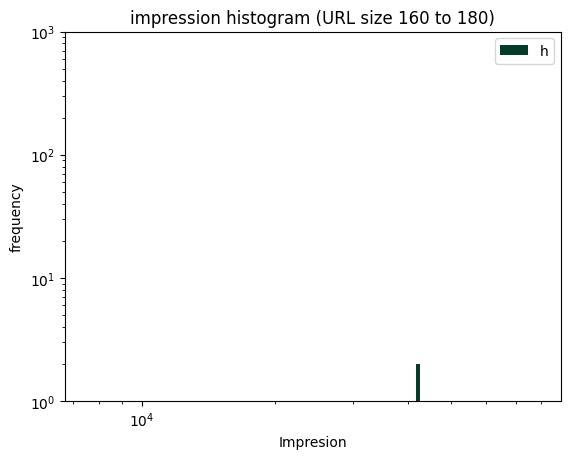

In [251]:
# plt.figure(figsize=(30,20))
for i in range(0, 6):
    x = df.loc[(df['Top pages'].str.len() > 50 + 20 * i) & (df['Top pages'].str.len() < 70 + 20 * i), 'Impressions']
    plt.xscale("log")
    plt.yscale("log")
    plt.title("impression histogram (URL size {} to {})".format(60 + 20 * i, 80 + 20 * i))
    plt.xlabel("Impresion")
    plt.ylabel("frequency")
    # plt.subplot(2 , 3, i+1)
    plt.hist(x, bins=40, rwidth=0.5, color='#063b2b')
    plt.ylim(1, 1000)
    plt.legend('histogram')
    plt.show()

# plt.show() 


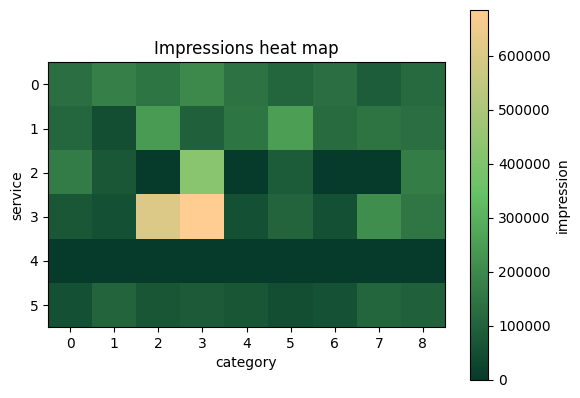

In [252]:

plt.imshow([[x if not pd.isna(x) else 0 for x in y]for y in category_impression_average], cmap=cmap)
plt.title("Impressions heat map")
plt.xlabel("category")
plt.ylabel("service")

plt.colorbar().set_label("impression")
plt.show()

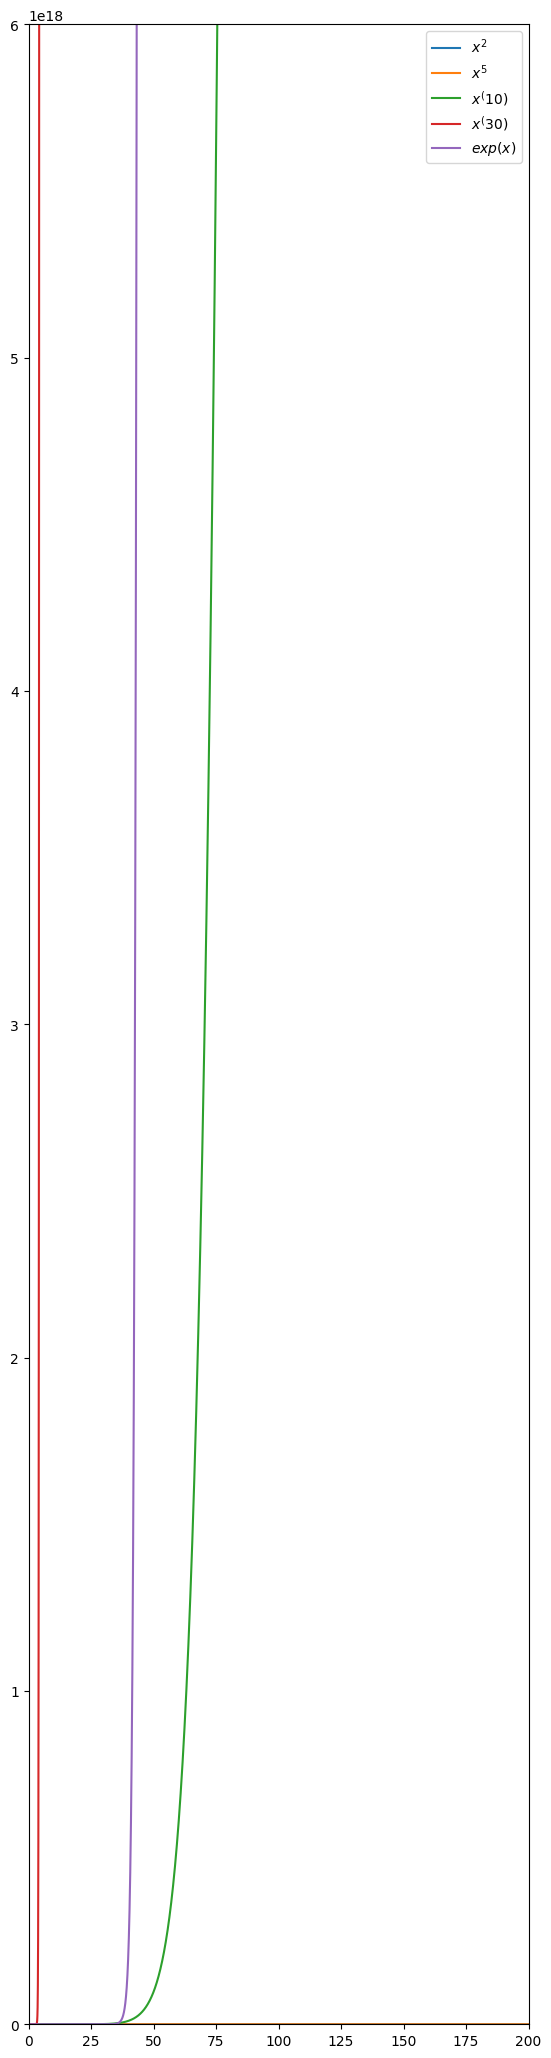

In [253]:
x = np.linspace(0, 90 * np.pi, 20000)


fig = plt.figure(figsize=(10, 20))
ax = fig.add_axes([1, 1, 0.5, 1])
ax.plot(x, x**2)
ax.plot(x, x**5)
ax.plot(x, x**10)
ax.plot(x, x**30)
ax.plot(x, np.exp(x))

ax.set_xlim(0, 200)
ax.set_ylim(0, 6000000000000000000)
ax.legend([r'$x^2$', r'$x^5$', r'$x^(10)$', r'$x^(30)$', r'$exp(x)$'])
plt.show()